<a href="https://colab.research.google.com/github/NastasijaaS/Natural-language-processing/blob/main/Projekat_Duboke_neuronske_mreze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade gensim --quiet

In [ ]:
!pip install sacremoses --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 4.4 MB/s eta 0:00:00


In [ ]:
!pip install nlpaug --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 2.8 MB/s eta 0:00:00


In [ ]:
! pip install transformers[sentencepiece] --quiet

In [ ]:
! pip install datasets --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.


In [ ]:
!pip install transformers[torch] accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 28.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylin

In [ ]:
import gensim
import sacremoses
import nlpaug.augmenter.word as naw
import nlpaug.flow as nafc
import nlpaug.augmenter.sentence as nas
from nlpaug.util import Action
import nltk
from transformers import pipeline
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
import os
import pandas as pd
import torch
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datasets import DatasetDict, Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import Trainer, TrainingArguments
import nlpaug.augmenter.char as nac
from transformers import Trainer
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import gc

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('twitter_sentiment_data.csv')

In [ ]:
print("Shape:",data.shape)
data.head(10)

Shape: (43943, 3)


,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153
5,0,Unamshow awache kujinga na iko global warming ...,793125429418815489
6,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125430236684289
7,2,RT @CCIRiviera: Presidential Candidate #Donald...,793126558688878592
8,0,RT @AmericanIndian8: Leonardo DiCaprio's clima...,793127097854197761
9,1,#BeforeTheFlood Watch #BeforeTheFlood right he...,793127346106753028


In [ ]:
data = data.rename(columns = {"sentiment": "label", "message": "text"}).drop('tweetid', axis = 1)

In [ ]:
data['label'] = data['label'].replace([-1, 0, 1, 2],[0, 1, 2, 3])

In [ ]:
data.dtypes

label     int64
text     object
dtype: object

In [ ]:
data.isna().sum()

label    0
text     0
dtype: int64

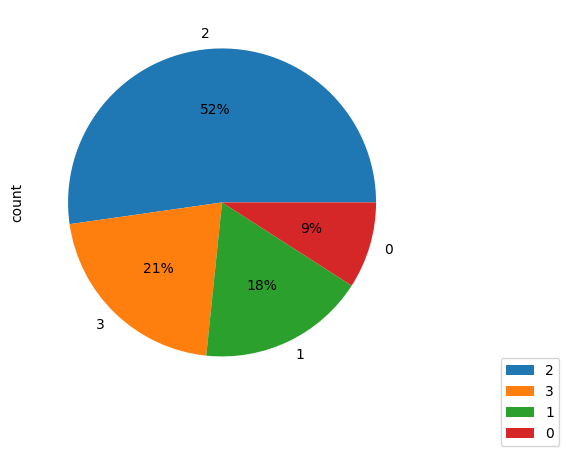

In [ ]:
plt.figure(figsize=(7, 5))
pie = data.label.value_counts().plot(kind='pie', autopct='%1.0f%%')
pie.figure.set_size_inches(7, 5)
pie.figure.legend(loc='lower right')
plt.show()

In [ ]:
data_label_2 = data[data['label'] == 2]
num_rows_to_drop = int(0.7 * len(data_label_2))
rows_to_drop = np.random.choice(data_label_2.index, size=num_rows_to_drop, replace=False)

data.drop(rows_to_drop, inplace=True)

In [ ]:
data.shape

(27870, 2)

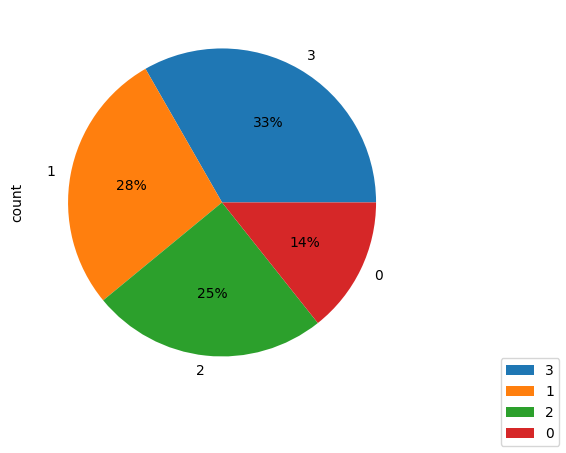

In [ ]:
plt.figure(figsize=(7, 5))
pie = data.label.value_counts().plot(kind='pie', autopct='%1.0f%%')
pie.figure.set_size_inches(7, 5)
pie.figure.legend(loc='lower right')
plt.show()

In [ ]:
data_label_3 = data[data['label'] == 3]
num_rows_to_drop = int(0.2 * len(data_label_3))
rows_to_drop = np.random.choice(data_label_3.index, size=num_rows_to_drop, replace=False)

data.drop(rows_to_drop, inplace=True)

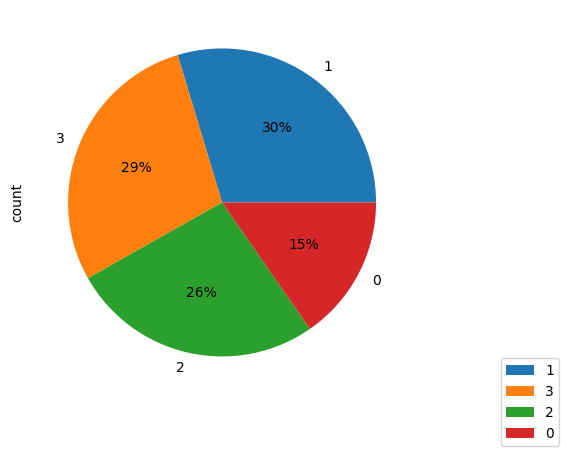

In [ ]:
plt.figure(figsize=(7, 5))
pie = data.label.value_counts().plot(kind='pie', autopct='%1.0f%%')
pie.figure.set_size_inches(7, 5)
pie.figure.legend(loc='lower right')
plt.show()

In [ ]:
data.shape

(26015, 2)

In [ ]:
train_df, valtest_df = train_test_split(data, test_size = 0.2, random_state = 42)
val_df, test_df = train_test_split(valtest_df, test_size = 0.5, random_state = 42)
train_df.shape, val_df.shape, test_df.shape

((20812, 2), (2601, 2), (2602, 2))

In [ ]:
dset_train = Dataset.from_pandas(train_df)
dset_val = Dataset.from_pandas(val_df)
dset_test = Dataset.from_pandas(test_df)

In [ ]:
tweets = DatasetDict({
  'train': dset_train,
  'val': dset_val,
  'test': dset_test})
tweets = tweets.remove_columns(["__index_level_0__"])

In [ ]:
tweets

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 20812
    })
    val: Dataset({
        features: ['label', 'text'],
        num_rows: 2601
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 2602
    })
})

In [ ]:
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
def tokenize(batch):
  return tokenizer(
    batch["text"],
    padding = True,
    truncation = True)

In [ ]:
tweets_encoded = tweets.map(
  tokenize,

  batched = True,
  batch_size = None)

Map:   0%|          | 0/20812 [00:00<?, ? examples/s]

Map:   0%|          | 0/2601 [00:00<?, ? examples/s]

Map:   0%|          | 0/2602 [00:00<?, ? examples/s]

In [ ]:
tweets_encoded

DatasetDict({
    train: Dataset({
        features: ['label', 'text', 'input_ids', 'attention_mask'],
        num_rows: 20812
    })
    val: Dataset({
        features: ['label', 'text', 'input_ids', 'attention_mask'],
        num_rows: 2601
    })
    test: Dataset({
        features: ['label', 'text', 'input_ids', 'attention_mask'],
        num_rows: 2602
    })
})

In [ ]:
tweets_encoded = tweets_encoded.remove_columns(['text'])

tweets_encoded.set_format("torch", columns = ["input_ids", "attention_mask", "label"])

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
label2id = {}
id2label = {}
labels = ['anti', 'neutral', 'pro', 'news']
for i, label_name in enumerate(labels):
  label2id[label_name] = str(i)
  id2label[str(i)] = label_name

label2id, id2label, len(label2id)

({'anti': '0', 'neutral': '1', 'pro': '2', 'news': '3'},
 {'0': 'anti', '1': 'neutral', '2': 'pro', '3': 'news'},
 4)

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(
  model_ckpt,
  num_labels = len(label2id),
  label2id = label2id,
  id2label = id2label).to(device)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def compute_metrics(pred):

  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average = "weighted")
  acc = accuracy_score(labels, preds)
  return {"accuracy": acc, "f1": f1}

In [ ]:
batch_size = 8
num_epochs = 3

model_name = f"{model_ckpt}-finetuned-climate-change"

path_model = '/content/drive/MyDrive/DeepLearning/Models'

training_args = TrainingArguments(

  output_dir = os.path.join(path_model, model_name),
  num_train_epochs = num_epochs,
  learning_rate = 2e-5,
  per_device_train_batch_size = batch_size,
  per_device_eval_batch_size = batch_size,
  weight_decay = 0.01,
  eval_strategy="epoch",
  load_best_model_at_end = True,
  push_to_hub = False,
  save_strategy = "epoch")

In [ ]:
trainer = Trainer(
  model = model,
  args = training_args,
  compute_metrics = compute_metrics,
  train_dataset = tweets_encoded["train"],
  eval_dataset = tweets_encoded["val"],
  tokenizer = tokenizer)

In [ ]:
gc.collect()
torch.cuda.empty_cache()

Without augmentation

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.718500,0.686905,0.718954,0.717339
2,0.529400,0.689862,0.745867,0.745489
3,0.365700,0.854273,0.743945,0.741780


TrainOutput(global_step=7806, training_loss=0.5619700913425595, metrics={'train_runtime': 1668.1663, 'train_samples_per_second': 37.428, 'train_steps_per_second': 4.679, 'total_flos': 4377830065320096.0, 'train_loss': 0.5619700913425595, 'epoch': 3.0})

In [ ]:
preds_output = trainer.predict(tweets_encoded["val"])

In [ ]:
preds_output.metrics

{'test_loss': 0.6869049668312073,
 'test_accuracy': 0.7189542483660131,
 'test_f1': 0.7173390861965514,
 'test_runtime': 7.029,
 'test_samples_per_second': 370.039,
 'test_steps_per_second': 46.379}

In [ ]:
y_preds = np.argmax(preds_output.predictions, axis = 1)

Text(0.5, 1.0, 'Normalized confusion matrix')

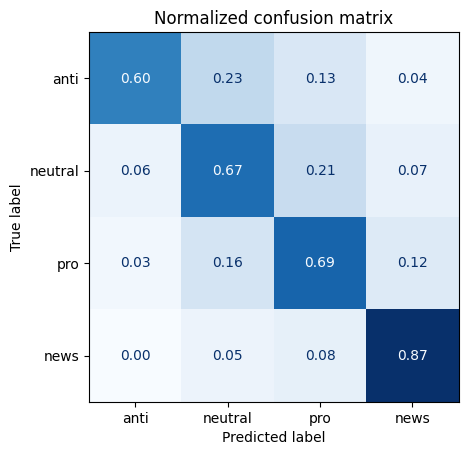

In [ ]:
cm = confusion_matrix(tweets_encoded["val"]['label'], y_preds, normalize = "true")
labels = ['anti', 'neutral', 'pro', 'news']
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot(cmap = "Blues", values_format = ".2f", colorbar = False)
plt.title("Normalized confusion matrix")

In [ ]:
preds_output = trainer.predict(tweets_encoded["test"])
preds_output.metrics

{'test_loss': 0.6743456721305847,
 'test_accuracy': 0.7355880092236741,
 'test_f1': 0.7325217424086723,
 'test_runtime': 7.6792,
 'test_samples_per_second': 338.838,
 'test_steps_per_second': 42.452}

In [ ]:
model.save_pretrained(
  os.path.join(path_model, 'distilbert-base-uncased-finetuned-tweets-climate-change'))
tokenizer.save_pretrained(
    os.path.join(path_model, 'distilbert-base-uncased-finetuned-tweets-climate-change'))

('/content/drive/MyDrive/DeepLearning/Models/distilbert-base-uncased-finetuned-tweets-climate-change/tokenizer_config.json',
 '/content/drive/MyDrive/DeepLearning/Models/distilbert-base-uncased-finetuned-tweets-climate-change/special_tokens_map.json',
 '/content/drive/MyDrive/DeepLearning/Models/distilbert-base-uncased-finetuned-tweets-climate-change/vocab.txt',
 '/content/drive/MyDrive/DeepLearning/Models/distilbert-base-uncased-finetuned-tweets-climate-change/added_tokens.json',
 '/content/drive/MyDrive/DeepLearning/Models/distilbert-base-uncased-finetuned-tweets-climate-change/tokenizer.json')

In [ ]:
classifier = pipeline(
  "text-classification",
  model = os.path.join(path_model, 'distilbert-base-uncased-finetuned-tweets-climate-change'),
  tokenizer = os.path.join(path_model, 'distilbert-base-uncased-finetuned-tweets-climate-change'))

In [ ]:
custom_tweet = "Stop dumping trash and save our ocean!"
preds = classifier(custom_tweet, return_all_scores = True)
preds

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


[[{'label': 'anti', 'score': 0.03508559241890907},
  {'label': 'neutral', 'score': 0.20993320643901825},
  {'label': 'pro', 'score': 0.7516967058181763},
  {'label': 'news', 'score': 0.0032845111563801765}]]

In [ ]:
custom_tweet = "Global warming is a fake claim made by some crazy scientists!"
preds = classifier(custom_tweet)
preds

[{'label': 'anti', 'score': 0.9285029172897339}]

Character augmenter

In [ ]:
aug1 = nac.OcrAug()

In [ ]:
def evaluate_aug1(n, train_df, dset_val, dset_test):
    augmented_tweets = []
    augmented_tweets_labels = []

    for i in train_df.index:
        lst_augment = aug1.augment(train_df['text'].loc[i], n=n)
        for augment in lst_augment:
            augmented_tweets.append(augment)
            augmented_tweets_labels.append(train_df['label'].loc[i])

    augmented_tweets_labels = list(zip(augmented_tweets, augmented_tweets_labels))

    df_augmented_tweets_labels = pd.DataFrame(
        augmented_tweets_labels, columns=['text', 'label'])

    train_df_augmented = pd.concat([train_df, df_augmented_tweets_labels], axis=0)
    dset_train_augmented = Dataset.from_pandas(train_df_augmented)
    tweets_augmented = DatasetDict({
        'train': dset_train_augmented,
        'val': dset_val,
        'test': dset_test})
    tweets_augmented = tweets_augmented.remove_columns(["__index_level_0__"])

    tweets_augmented_encoded = tweets_augmented.map(
        tokenize,
        batched=True,
        batch_size=None)

    tweets_augmented_encoded = tweets_augmented_encoded.remove_columns(['text'])

    tweets_augmented_encoded.set_format(
        "torch", columns=["input_ids", "attention_mask", "label"])

    trainer = Trainer(
        model=model,
        args=training_args,
        compute_metrics=compute_metrics,
        train_dataset=tweets_augmented_encoded["train"],
        eval_dataset=tweets_augmented_encoded["val"],
        tokenizer=tokenizer)

    gc.collect()
    torch.cuda.empty_cache()

    trainer.train()

    preds_output = trainer.predict(tweets_augmented_encoded["test"])
    print(preds_output.metrics)

    augmented_tweets.clear()
    augmented_tweets_labels.clear()


In [ ]:
score_ocr = evaluate_aug1(
  n = 1,
  train_df = train_df,
  dset_val = dset_val,
  dset_test = dset_test)
print(score_ocr)

Map:   0%|          | 0/41624 [00:00<?, ? examples/s]

Map:   0%|          | 0/2601 [00:00<?, ? examples/s]

Map:   0%|          | 0/2602 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.486000,0.721577,0.739331,0.736167
2,0.302300,1.154968,0.748174,0.746239
3,0.151300,1.507758,0.754325,0.753055


{'test_loss': 0.7114133238792419, 'test_accuracy': 0.7455803228285934, 'test_f1': 0.7418283130573838, 'test_runtime': 6.9293, 'test_samples_per_second': 375.504, 'test_steps_per_second': 47.046}
None


Word augmenter


In [ ]:
aug2 = naw.SynonymAug(aug_src='wordnet')

In [ ]:
def evaluate_aug2(n, train_df, dset_val, dset_test):
    augmented_tweets = []
    augmented_tweets_labels = []

    for i in train_df.index:
        lst_augment = aug2.augment(train_df['text'].loc[i], n=n)
        for augment in lst_augment:
            augmented_tweets.append(augment)
            augmented_tweets_labels.append(train_df['label'].loc[i])

    augmented_tweets_labels = list(zip(augmented_tweets, augmented_tweets_labels))

    df_augmented_tweets_labels = pd.DataFrame(
        augmented_tweets_labels, columns=['text', 'label'])

    train_df_augmented = pd.concat([train_df, df_augmented_tweets_labels], axis=0)
    dset_train_augmented = Dataset.from_pandas(train_df_augmented)
    tweets_augmented = DatasetDict({
        'train': dset_train_augmented,
        'val': dset_val,
        'test': dset_test})
    tweets_augmented = tweets_augmented.remove_columns(["__index_level_0__"])

    tweets_augmented_encoded = tweets_augmented.map(
        tokenize,
        batched=True,
        batch_size=None)

    tweets_augmented_encoded = tweets_augmented_encoded.remove_columns(['text'])

    tweets_augmented_encoded.set_format(
        "torch", columns=["input_ids", "attention_mask", "label"])

    trainer = Trainer(
        model=model,
        args=training_args,
        compute_metrics=compute_metrics,
        train_dataset=tweets_augmented_encoded["train"],
        eval_dataset=tweets_augmented_encoded["val"],
        tokenizer=tokenizer)

    gc.collect()
    torch.cuda.empty_cache()

    trainer.train()

    preds_output = trainer.predict(tweets_augmented_encoded["test"])
    print(preds_output.metrics)

    augmented_tweets.clear()
    augmented_tweets_labels.clear()

In [ ]:
score_synonym = evaluate_aug2(
  n = 1,
  train_df = train_df,
  dset_val = dset_val,
  dset_test = dset_test)
print(score_synonym)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Map:   0%|          | 0/41624 [00:00<?, ? examples/s]

Map:   0%|          | 0/2601 [00:00<?, ? examples/s]

Map:   0%|          | 0/2602 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.607700,0.626326,0.753556,0.752329
2,0.339600,0.834927,0.760477,0.759541
3,0.193400,1.288633,0.762784,0.761206


{'test_loss': 0.6638085246086121, 'test_accuracy': 0.750576479631053, 'test_f1': 0.7490298049024506, 'test_runtime': 7.4457, 'test_samples_per_second': 349.465, 'test_steps_per_second': 43.784}
None


In [ ]:
aug3 = naw.ContextualWordEmbsAug(model_path='bert-base-uncased', action="insert",device='cuda')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
def evaluate_aug3(n, train_df, dset_val, dset_test):
    augmented_tweets = []
    augmented_tweets_labels = []

    for i in train_df.index:
        lst_augment = aug3.augment(train_df['text'].loc[i], n=n)
        for augment in lst_augment:
            augmented_tweets.append(augment)
            augmented_tweets_labels.append(train_df['label'].loc[i])

    augmented_tweets_labels = list(zip(augmented_tweets, augmented_tweets_labels))

    df_augmented_tweets_labels = pd.DataFrame(
        augmented_tweets_labels, columns=['text', 'label'])

    train_df_augmented = pd.concat([train_df, df_augmented_tweets_labels], axis=0)
    dset_train_augmented = Dataset.from_pandas(train_df_augmented)
    tweets_augmented = DatasetDict({
        'train': dset_train_augmented,
        'val': dset_val,
        'test': dset_test})
    tweets_augmented = tweets_augmented.remove_columns(["__index_level_0__"])

    tweets_augmented_encoded = tweets_augmented.map(
        tokenize,
        batched=True,
        batch_size=None)

    tweets_augmented_encoded = tweets_augmented_encoded.remove_columns(['text'])

    tweets_augmented_encoded.set_format(
        "torch", columns=["input_ids", "attention_mask", "label"])

    trainer = Trainer(
        model=model,
        args=training_args,
        compute_metrics=compute_metrics,
        train_dataset=tweets_augmented_encoded["train"],
        eval_dataset=tweets_augmented_encoded["val"],
        tokenizer=tokenizer)

    gc.collect()
    torch.cuda.empty_cache()

    trainer.train()

    preds_output = trainer.predict(tweets_augmented_encoded["test"])
    print(preds_output.metrics)

    augmented_tweets.clear()
    augmented_tweets_labels.clear()

In [ ]:
score_context = evaluate_aug3(
  n = 1,
  train_df = train_df,
  dset_val = dset_val,
  dset_test = dset_test)
print(score_context)

Map:   0%|          | 0/41624 [00:00<?, ? examples/s]

Map:   0%|          | 0/2601 [00:00<?, ? examples/s]

Map:   0%|          | 0/2602 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.588700,0.665684,0.743176,0.742203
2,0.345200,1.015972,0.744714,0.740902
3,0.191800,1.362999,0.750481,0.748397


{'test_loss': 0.6403514742851257, 'test_accuracy': 0.7540353574173713, 'test_f1': 0.7528914162006741, 'test_runtime': 6.8119, 'test_samples_per_second': 381.977, 'test_steps_per_second': 47.857}
None


Sentance augmenter

In [ ]:
aug4 = nas.ContextualWordEmbsForSentenceAug(model_path='gpt2',device='cuda')

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [ ]:
def evaluate_aug4(n, train_df, dset_val, dset_test):
    augmented_tweets = []
    augmented_tweets_labels = []

    for i in train_df.index:
        lst_augment = aug4.augment(train_df['text'].loc[i], n=n)
        for augment in lst_augment:
            augmented_tweets.append(augment)
            augmented_tweets_labels.append(train_df['label'].loc[i])

    augmented_tweets_labels = list(zip(augmented_tweets, augmented_tweets_labels))

    df_augmented_tweets_labels = pd.DataFrame(
        augmented_tweets_labels, columns=['text', 'label'])

    train_df_augmented = pd.concat([train_df, df_augmented_tweets_labels], axis=0)
    dset_train_augmented = Dataset.from_pandas(train_df_augmented)
    tweets_augmented = DatasetDict({
        'train': dset_train_augmented,
        'val': dset_val,
        'test': dset_test})
    tweets_augmented = tweets_augmented.remove_columns(["__index_level_0__"])

    tweets_augmented_encoded = tweets_augmented.map(
        tokenize,
        batched=True,
        batch_size=None)

    tweets_augmented_encoded = tweets_augmented_encoded.remove_columns(['text'])

    tweets_augmented_encoded.set_format(
        "torch", columns=["input_ids", "attention_mask", "label"])

    trainer = Trainer(
        model=model,
        args=training_args,
        compute_metrics=compute_metrics,
        train_dataset=tweets_augmented_encoded["train"],
        eval_dataset=tweets_augmented_encoded["val"],
        tokenizer=tokenizer)

    gc.collect()
    torch.cuda.empty_cache()

    trainer.train()

    preds_output = trainer.predict(tweets_augmented_encoded["test"])
    print(preds_output.metrics)

    augmented_tweets.clear()
    augmented_tweets_labels.clear()

In [ ]:
score_gpt = evaluate_aug4(
  n = 1,
  train_df = train_df,
  dset_val = dset_val,
  dset_test = dset_test)
print(score_gpt)

Map:   0%|          | 0/41624 [00:00<?, ? examples/s]

Map:   0%|          | 0/2601 [00:00<?, ? examples/s]

Map:   0%|          | 0/2602 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.494900,0.669121,0.761630,0.759266
2,0.222000,1.144494,0.763168,0.760871
3,0.110300,1.507957,0.759323,0.757515


{'test_loss': 0.6830383539199829, 'test_accuracy': 0.754803996925442, 'test_f1': 0.752698878795083, 'test_runtime': 6.6182, 'test_samples_per_second': 393.159, 'test_steps_per_second': 49.258}
None
